In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
from google.colab import files
import io

try:
  uploaded
except NameError:
  uploaded = files.upload()

Saving ottdata.csv to ottdata.csv


In [3]:
cData = pd.read_csv(io.BytesIO(uploaded['ottdata.csv']))

In [4]:
cData.shape

(1000, 8)

In [5]:
cData.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74,0.39
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81,0.44
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83,0.46


In [6]:
cData.tail()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
995,1.58,1311.96,0,Romance,Friday,Fall,48.58,0.36
996,1.34,1329.48,0,Action,Friday,Summer,72.42,0.56
997,1.62,1359.80,1,Sci-Fi,Wednesday,Fall,150.44,0.66
998,2.06,1698.35,0,Romance,Monday,Summer,48.72,0.47
999,1.36,1140.23,0,Comedy,Saturday,Summer,52.94,0.49


In [7]:
cData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitors            1000 non-null   float64
 1   ad_impressions      1000 non-null   float64
 2   major_sports_event  1000 non-null   int64  
 3   genre               1000 non-null   object 
 4   dayofweek           1000 non-null   object 
 5   season              1000 non-null   object 
 6   views_trailer       1000 non-null   float64
 7   views_content       1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [8]:
cData['major_sports_event'] = pd.Categorical(cData['major_sports_event'], categories=[0,1], ordered=True)

In [9]:
cData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   visitors            1000 non-null   float64 
 1   ad_impressions      1000 non-null   float64 
 2   major_sports_event  1000 non-null   category
 3   genre               1000 non-null   object  
 4   dayofweek           1000 non-null   object  
 5   season              1000 non-null   object  
 6   views_trailer       1000 non-null   float64 
 7   views_content       1000 non-null   float64 
dtypes: category(1), float64(4), object(3)
memory usage: 55.9+ KB


In [10]:
cData.describe()

,visitors,ad_impressions,views_trailer,views_content
count,1000.000000,1000.000000,1000.00000,1000.000000
mean,1.704290,1434.712290,66.91559,0.473400
std,0.231973,289.534834,35.00108,0.105914
min,1.250000,1010.870000,30.08000,0.220000
25%,1.550000,1210.330000,50.94750,0.400000
50%,1.700000,1383.580000,53.96000,0.450000
75%,1.830000,1623.670000,57.75500,0.520000
max,2.340000,2424.200000,199.92000,0.890000


In [11]:
# univariate analysis
# numeric column

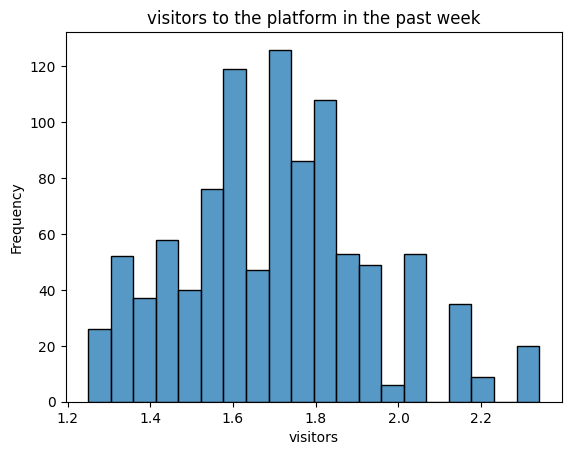

In [12]:
sns.histplot(data=cData, x='visitors')
plt.title('visitors to the platform in the past week')
plt.xlabel('visitors')
plt.ylabel('Frequency');

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


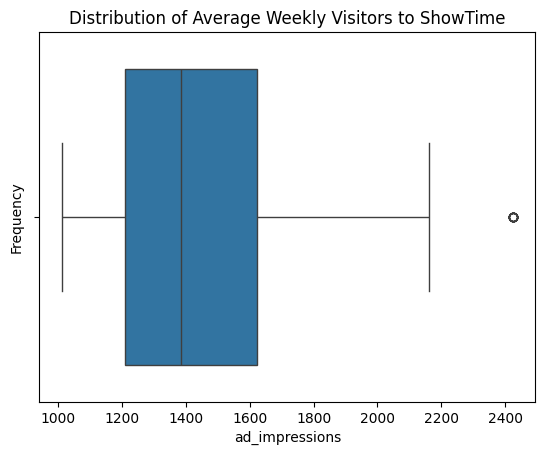

In [13]:
sns.boxplot(data=cData, x='ad_impressions')
plt.title('Distribution of Average Weekly Visitors to ShowTime')
plt.ylabel('Frequency');

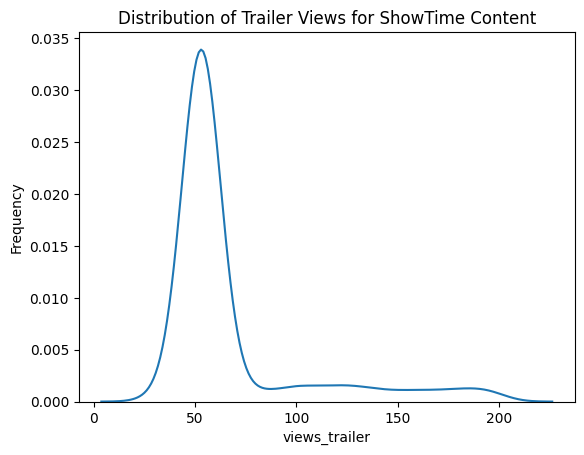

In [14]:
sns.kdeplot(data=cData, x='views_trailer')
plt.title('Distribution of Trailer Views for ShowTime Content')
plt.ylabel('Frequency');

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


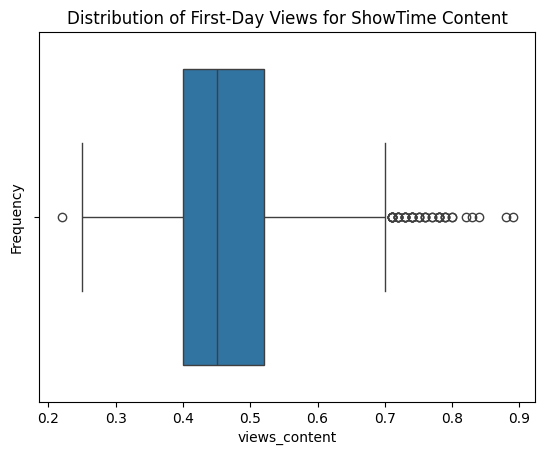

In [15]:
sns.boxplot(data=cData, x='views_content')
plt.title('Distribution of First-Day Views for ShowTime Content')
plt.ylabel('Frequency');

In [16]:
# categorical column

In [17]:
categorical_cloumn = cData.select_dtypes(include=['object', 'category']).columns
value_counts = {}
for colm in categorical_cloumn:
  value_counts[colm] = cData[colm].value_counts()
for colm, counts in value_counts.items():
    print(f"Value counts for {colm}:\n{counts}\n")

Value counts for major_sports_event:
major_sports_event
0    600
1    400
Name: count, dtype: int64

Value counts for genre:
genre
Others      255
Comedy      114
Thriller    113
Drama       109
Romance     105
Sci-Fi      102
Horror      101
Action      101
Name: count, dtype: int64

Value counts for dayofweek:
dayofweek
Friday       369
Wednesday    332
Thursday      97
Saturday      88
Sunday        67
Monday        24
Tuesday       23
Name: count, dtype: int64

Value counts for season:
season
Winter    257
Fall      252
Spring    247
Summer    244
Name: count, dtype: int64



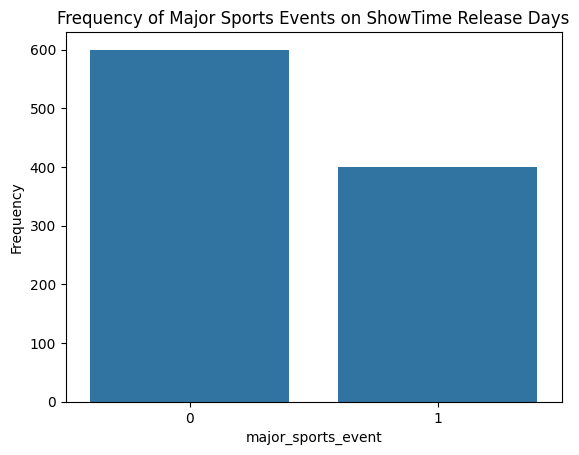

In [18]:
sns.countplot(data=cData, x='major_sports_event')
plt.title('Frequency of Major Sports Events on ShowTime Release Days')
plt.ylabel('Frequency');

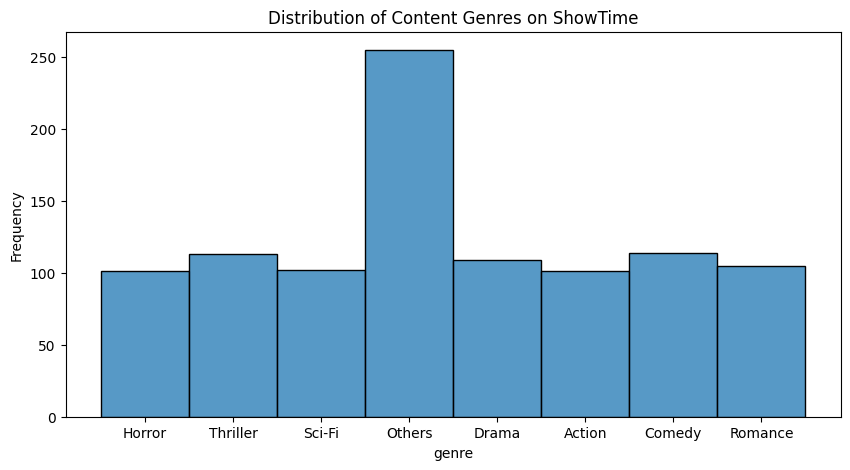

In [19]:
plt.figure(figsize= (10,5))
sns.histplot(data=cData, x='genre')
plt.title('Distribution of Content Genres on ShowTime')
plt.ylabel('Frequency');

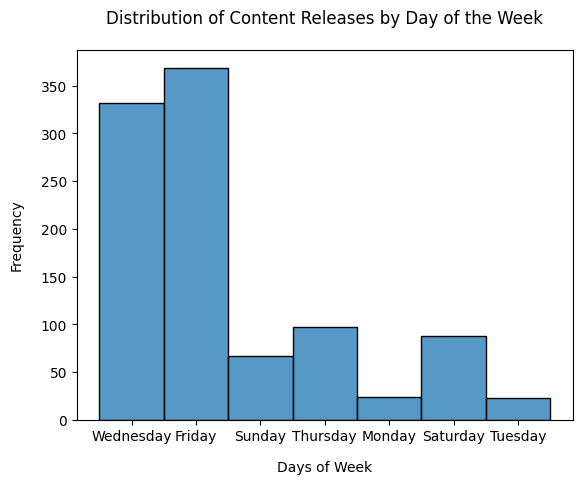

In [20]:
sns.histplot(data=cData, x='dayofweek')
plt.title('Distribution of Content Releases by Day of the Week', y=1.05)
plt.xlabel('Days of Week', labelpad = 12)
plt.ylabel('Frequency', labelpad = 12);

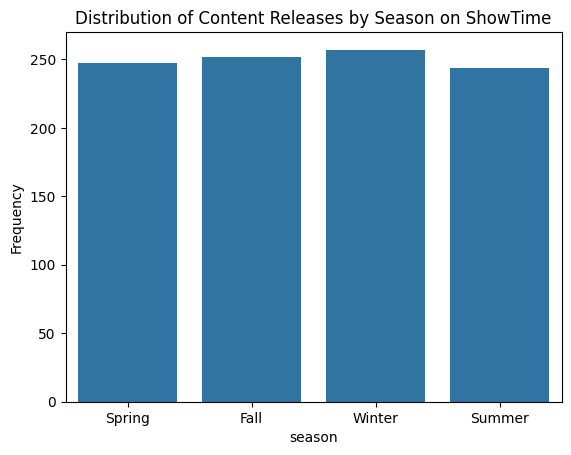

In [21]:
sns.countplot(data=cData, x='season')
plt.title('Distribution of Content Releases by Season on ShowTime')
plt.ylabel('Frequency');

In [22]:
# Bivariate Analysis
# Numeric columns

In [23]:
numeric_column = cData.select_dtypes(include = ['number']).columns

In [24]:
print(numeric_column)

Index(['visitors', 'ad_impressions', 'views_trailer', 'views_content'], dtype='object')


In [25]:
cData[numeric_column]

,visitors,ad_impressions,views_trailer,views_content
0,1.67,1113.81,56.70,0.51
1,1.46,1498.41,52.69,0.32
2,1.47,1079.19,48.74,0.39
3,1.85,1342.77,49.81,0.44
4,1.46,1498.41,55.83,0.46
...,...,...,...,...
995,1.58,1311.96,48.58,0.36
996,1.34,1329.48,72.42,0.56
997,1.62,1359.80,150.44,0.66
998,2.06,1698.35,48.72,0.47


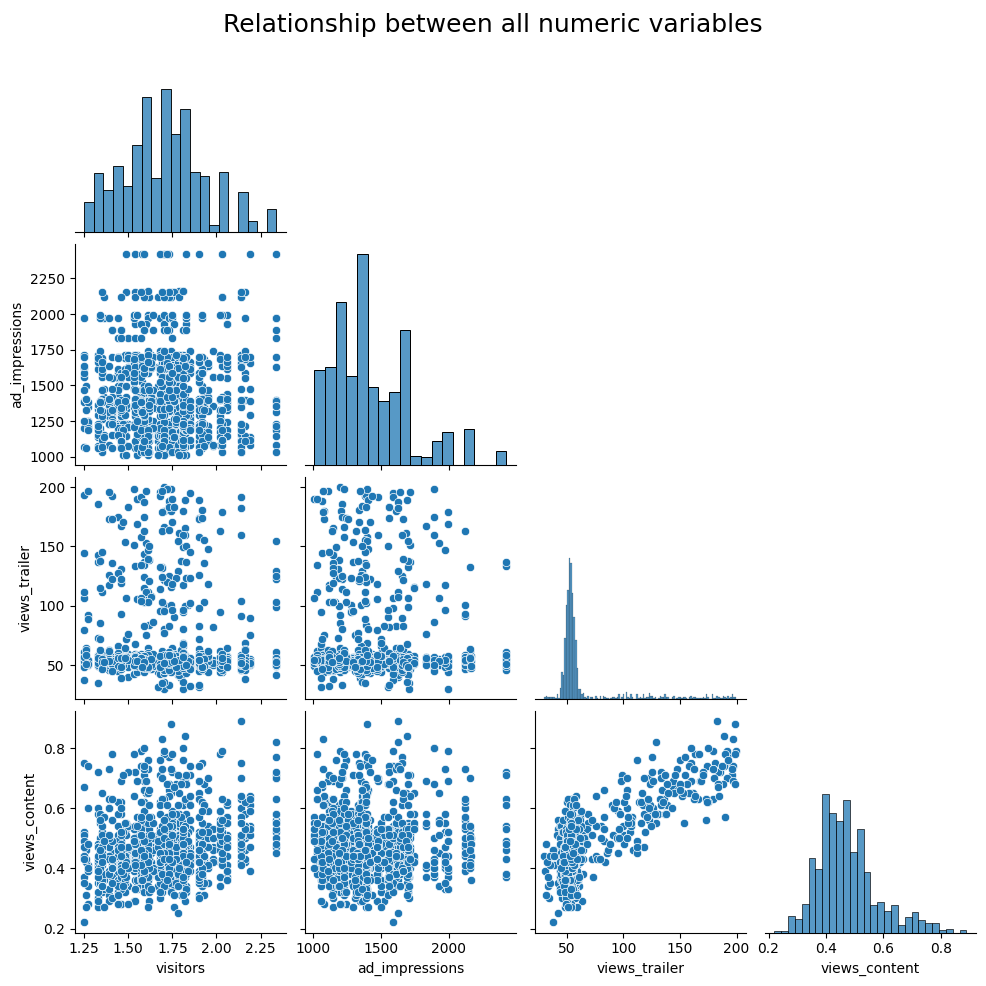

In [26]:
sns.pairplot(cData[numeric_column], corner=True)
plt.suptitle('Relationship between all numeric variables', fontsize=18);

In [27]:
# Numeric vs Categorical

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


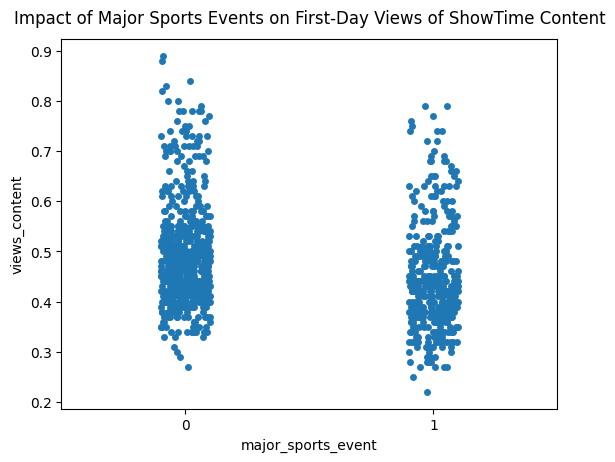

In [28]:
sns.stripplot(data=cData, x='major_sports_event', y='views_content')
plt.title('Impact of Major Sports Events on First-Day Views of ShowTime Content', y=1.02);

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


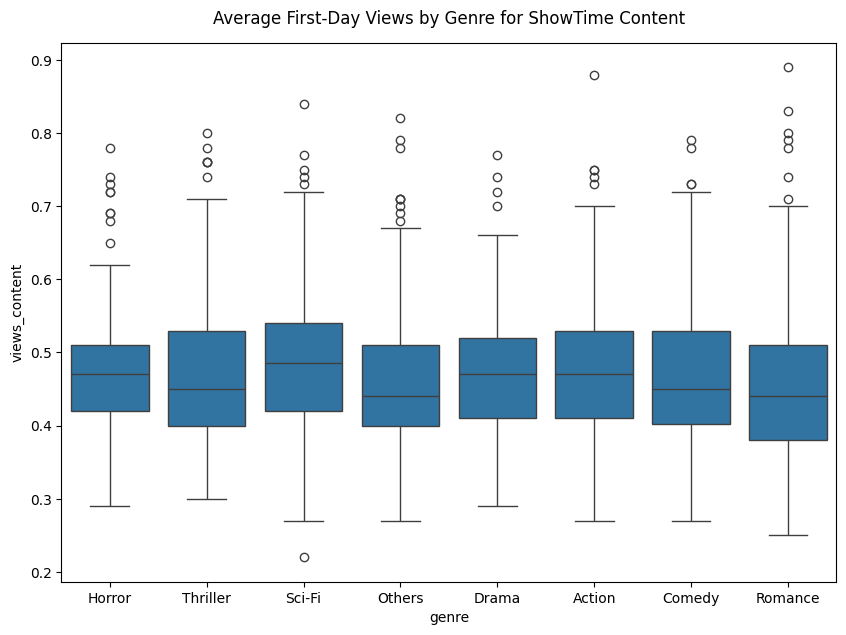

In [29]:
plt.figure(figsize=(10,7))
sns.boxplot(data=cData, x='genre', y='views_content')
plt.title('Average First-Day Views by Genre for ShowTime Content', y=1.02);

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

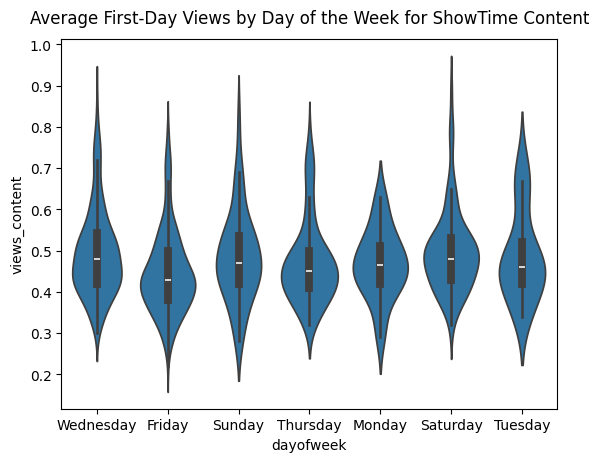

In [30]:
sns.violinplot(data=cData, x='dayofweek', y='views_content')
plt.title('Average First-Day Views by Day of the Week for ShowTime Content', y=1.02);

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


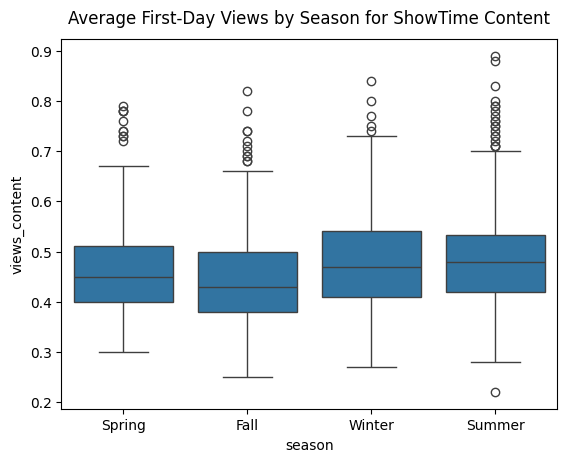

In [31]:
sns.boxplot(data=cData, x='season', y='views_content')
plt.title('Average First-Day Views by Season for ShowTime Content', y=1.02);

In [32]:
# Key answers for Key Questions

In [33]:
 correlation = cData['views_trailer'].corr(cData['views_content'])
 correlation

0.753962214820536

In [34]:
num_duplicates = cData.duplicated().sum()
print(f'Number of duplicate rows: {num_duplicates}')

Number of duplicate rows: 0


In [35]:
cData.isnull().any()

,0
visitors,False
ad_impressions,False
major_sports_event,False
genre,False
dayofweek,False
season,False
views_trailer,False
views_content,False


In [36]:
cData.isnull().sum()

,0
visitors,0
ad_impressions,0
major_sports_event,0
genre,0
dayofweek,0
season,0
views_trailer,0
views_content,0


In [37]:
digit_check = cData.applymap(lambda x:x.isdigit() if isinstance(x,str) else False)
print(digit_check)

     visitors  ad_impressions  major_sports_event  genre  dayofweek  season  \
0       False           False               False  False      False   False   
1       False           False               False  False      False   False   
2       False           False               False  False      False   False   
3       False           False               False  False      False   False   
4       False           False               False  False      False   False   
..        ...             ...                 ...    ...        ...     ...   
995     False           False               False  False      False   False   
996     False           False               False  False      False   False   
997     False           False               False  False      False   False   
998     False           False               False  False      False   False   
999     False           False               False  False      False   False   

     views_trailer  views_content  
0            Fa

<ipython-input-37-cab43759b45d>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  digit_check = cData.applymap(lambda x:x.isdigit() if isinstance(x,str) else False)


In [38]:
true_count = digit_check.sum()
true_count

,0
visitors,0
ad_impressions,0
major_sports_event,0
genre,0
dayofweek,0
season,0
views_trailer,0
views_content,0


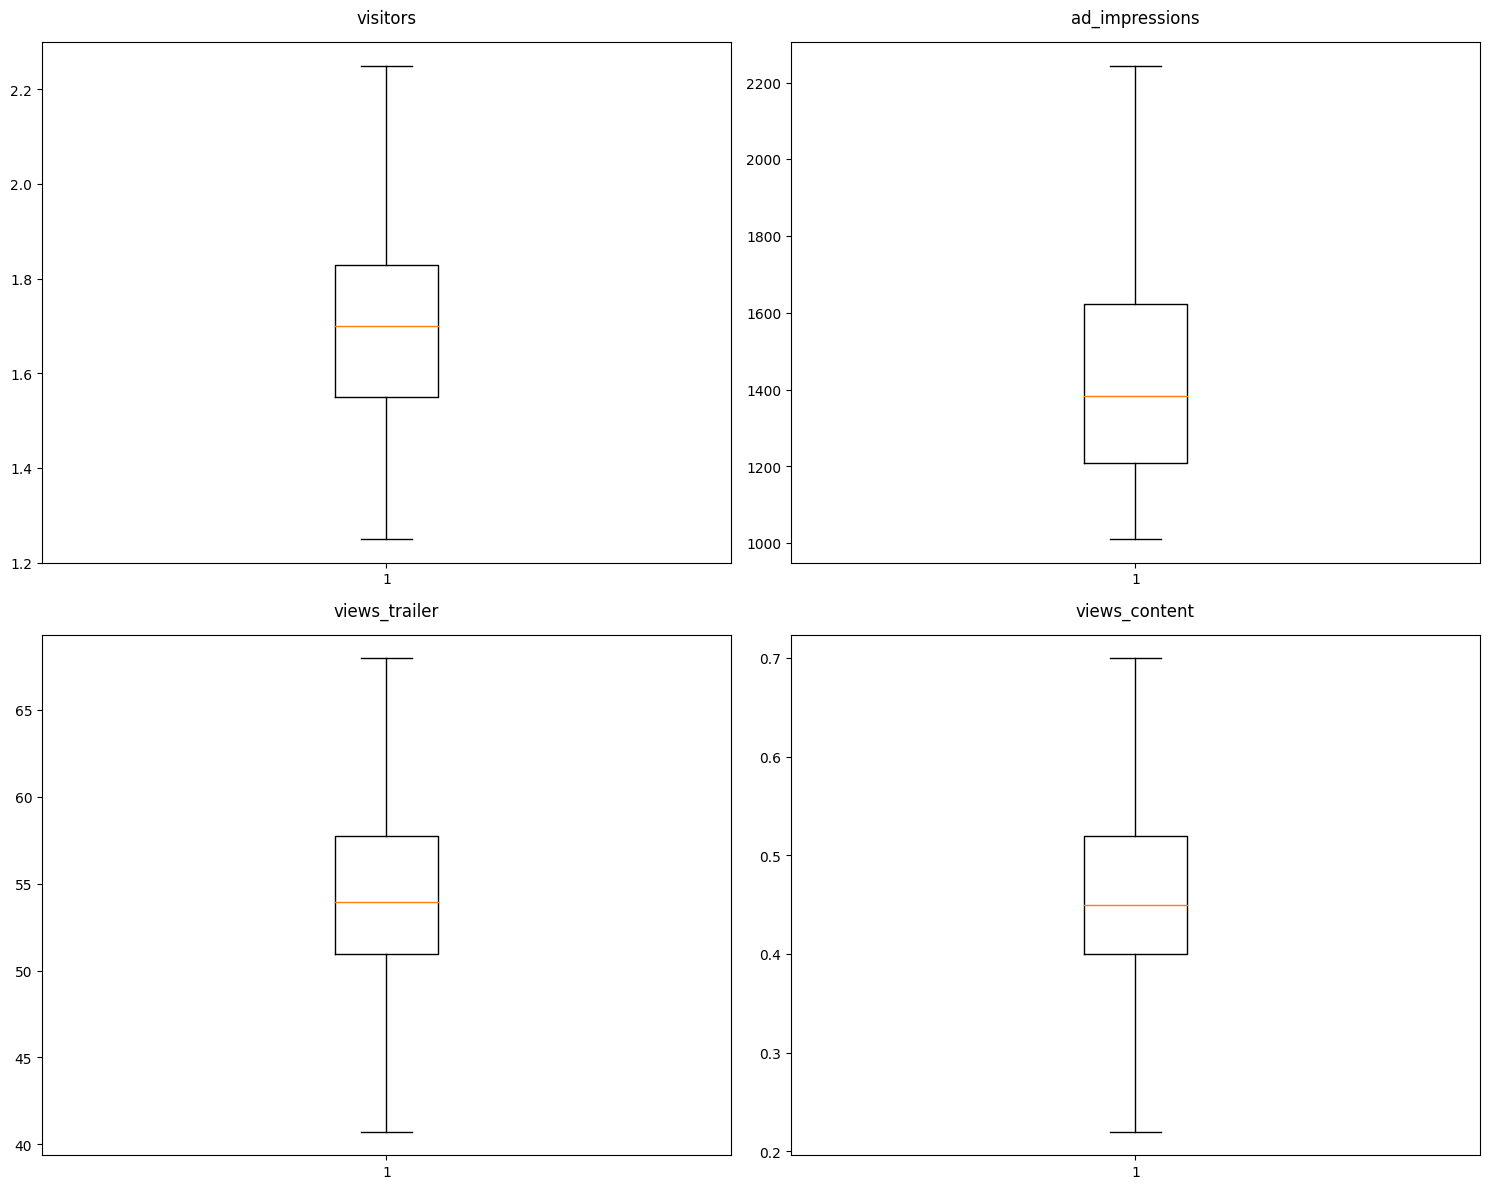

In [93]:
plt.figure(figsize=(15,12))
for i, variable in enumerate(numeric_column):
  plt.subplot(2,2, i+1)
  plt.boxplot(cData[variable], whis=1.5)
  plt.tight_layout()
  plt.title(variable, y=1.02)

In [40]:
q1 = cData[numeric_column].quantile(0.25)
q3 = cData[numeric_column].quantile(0.75)

iqr = q3-q1


lower_whisker = q1-1.5*iqr
upper_whisker = q3+1.5*iqr

print(lower_whisker)
print(upper_whisker)

visitors            1.13000
ad_impressions    590.32000
views_trailer      40.73625
views_content       0.22000
dtype: float64
visitors             2.25000
ad_impressions    2243.68000
views_trailer       67.96625
views_content        0.70000
dtype: float64


In [41]:
print(((cData[numeric_column]< lower_whisker) | (cData[numeric_column]> upper_whisker)).sum())
((cData[numeric_column]< lower_whisker) | (cData[numeric_column]> upper_whisker)).sum()/cData[numeric_column].shape[0]*100

visitors           20
ad_impressions     13
views_trailer     189
views_content      47
dtype: int64


,0
visitors,2.0
ad_impressions,1.3
views_trailer,18.9
views_content,4.7


In [42]:
def treat_outliers(df,col):
  q1= df[col].quantile(0.25)
  q3=df[col].quantile(0.75)
  iqr=q3-q1
  lower_whisker=q1-1.5*iqr
  upper_whisker=q3+1.5*iqr
  df[col]=np.clip(df[col], lower_whisker, upper_whisker)
  return(df)

In [43]:
cData.columns

Index(['visitors', 'ad_impressions', 'major_sports_event', 'genre',
       'dayofweek', 'season', 'views_trailer', 'views_content'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


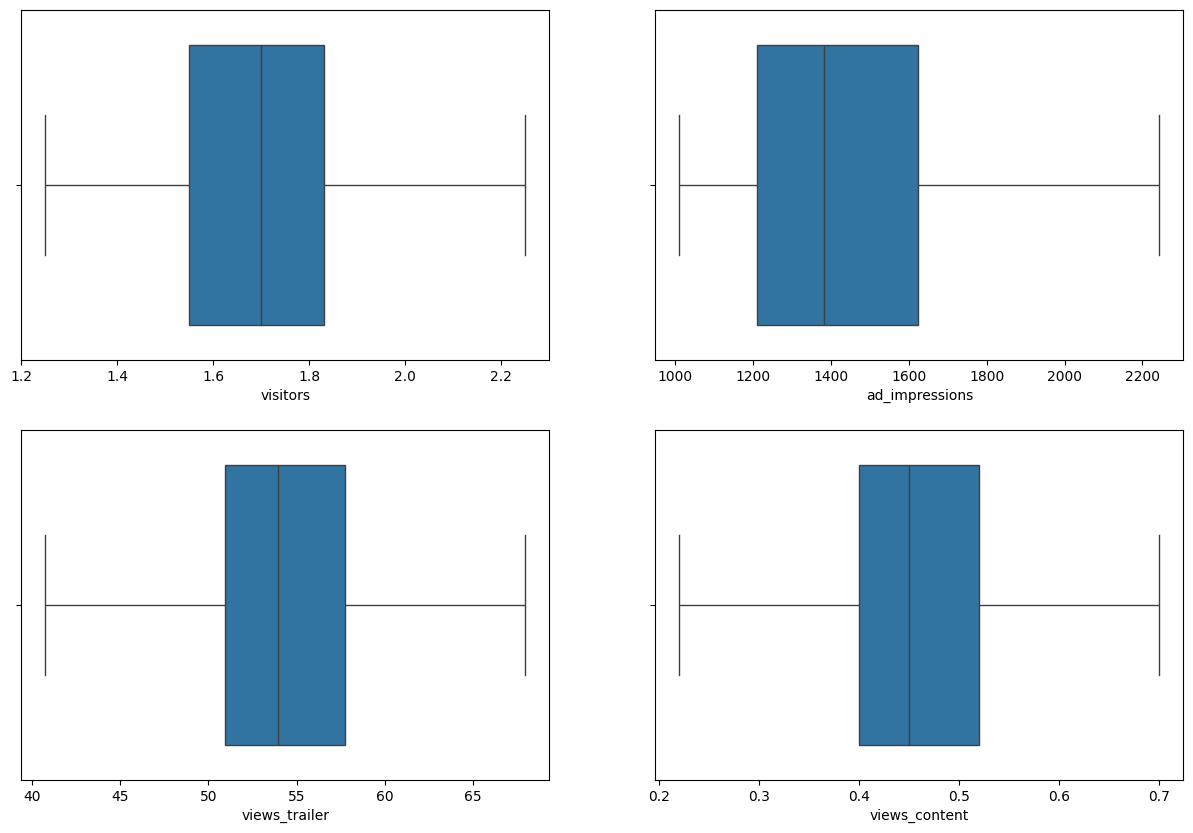

In [44]:
plt.figure(figsize=(15, 10))
for column in numeric_column:
  cData = treat_outliers(cData, column)
for i, column in enumerate(numeric_column):
  plt.subplot(2,2, i+1)
  sns.boxplot(data=cData, x=column);

In [45]:
print(((cData[numeric_column]< lower_whisker) | (cData[numeric_column]> upper_whisker)).sum())
((cData[numeric_column]< lower_whisker) | (cData[numeric_column]> upper_whisker)).sum()/cData[numeric_column].shape[0]*100

visitors          0
ad_impressions    0
views_trailer     0
views_content     0
dtype: int64


,0
visitors,0.0
ad_impressions,0.0
views_trailer,0.0
views_content,0.0


In [46]:
cData = pd.get_dummies(cData, columns=['major_sports_event', 'genre','dayofweek', 'season'], drop_first=True)
cData.head()

,visitors,ad_impressions,views_trailer,views_content,major_sports_event_1,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,...,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
0,1.67,1113.81,56.70,0.51,False,False,False,True,False,False,...,False,False,False,False,False,False,True,True,False,False
1,1.46,1498.41,52.69,0.32,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,1.47,1079.19,48.74,0.39,True,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,1.85,1342.77,49.81,0.44,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1.46,1498.41,55.83,0.46,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [47]:
bool_columns = cData.select_dtypes(include='bool').columns
cData[bool_columns] = cData[bool_columns].astype(int)
cData.head()

,visitors,ad_impressions,views_trailer,views_content,major_sports_event_1,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,...,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
0,1.67,1113.81,56.70,0.51,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
1,1.46,1498.41,52.69,0.32,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.47,1079.19,48.74,0.39,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1.85,1342.77,49.81,0.44,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.46,1498.41,55.83,0.46,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [48]:

x = cData.drop(['views_content'],axis=1)
y= cData[['views_content']]

In [49]:
x = sm.add_constant(x)

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [51]:
x_train.head()

,const,visitors,ad_impressions,views_trailer,major_sports_event_1,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,...,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
731,1.0,1.64,1992.53,49.62000,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
716,1.0,1.69,2158.03,67.96625,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
640,1.0,1.47,1229.35,54.13000,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
804,1.0,1.49,1010.87,67.96625,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
737,1.0,2.19,1119.90,52.04000,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [52]:
x_test.head()

,const,visitors,ad_impressions,views_trailer,major_sports_event_1,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,...,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
507,1.0,1.58,1323.74,57.85000,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
818,1.0,1.54,2122.33,56.82000,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
452,1.0,1.82,1152.29,67.96625,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
368,1.0,2.03,1145.37,59.99000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
242,1.0,1.75,1060.86,58.99000,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [53]:
olsmod = sm.OLS(y_train, x_train)
olsres = olsmod.fit()

In [54]:
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     60.73
Date:                Sun, 06 Oct 2024   Prob (F-statistic):          2.15e-136
Time:                        03:37:08   Log-Likelihood:                 986.21
No. Observations:                 700   AIC:                            -1930.
Df Residuals:                     679   BIC:                            -1835.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2730 

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series([variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],index=x_train.columns,)
print(vif_series1)

const                   166.186883
visitors                  1.026119
ad_impressions            1.029638
views_trailer             1.028166
major_sports_event_1      1.070634
genre_Comedy              1.913797
genre_Drama               1.921646
genre_Horror              1.902867
genre_Others              2.567207
genre_Romance             1.753305
genre_Sci-Fi              1.864765
genre_Thriller            1.920255
dayofweek_Monday          1.063674
dayofweek_Saturday        1.155999
dayofweek_Sunday          1.150747
dayofweek_Thursday        1.169813
dayofweek_Tuesday         1.059785
dayofweek_Wednesday       1.318664
season_Spring             1.541006
season_Summer             1.566296
season_Winter             1.570520
dtype: float64


In [56]:
x_train2 = x_train.drop(['genre_Others'], axis=1)
olsmod_1 = sm.OLS(y_train, x_train2)
olsres_1 = olsmod_1.fit()
print("R-squared:",(olsres_1.rsquared), "\nAdjusted R-squared", (olsres_1.rsquared_adj),)

R-squared: 0.6412672942331681 
Adjusted R-squared 0.6312438803955654


In [57]:
x_train = x_train.drop(['genre_Others'], axis=1)
olsmod_2 = sm.OLS(y_train, x_train)
olsres_2 = olsmod_2.fit()
print(olsres_2.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     63.98
Date:                Sun, 06 Oct 2024   Prob (F-statistic):          3.02e-137
Time:                        03:37:09   Log-Likelihood:                 986.07
No. Observations:                 700   AIC:                            -1932.
Df Residuals:                     680   BIC:                            -1841.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2771 

In [58]:

vif_series2 = pd.Series([variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],index=x_train.columns,)
print(vif_series2)

const                   153.669019
visitors                  1.020698
ad_impressions            1.028897
views_trailer             1.027870
major_sports_event_1      1.070178
genre_Comedy              1.204448
genre_Drama               1.223159
genre_Horror              1.205554
genre_Romance             1.171698
genre_Sci-Fi              1.205336
genre_Thriller            1.206277
dayofweek_Monday          1.063674
dayofweek_Saturday        1.155123
dayofweek_Sunday          1.150353
dayofweek_Thursday        1.169773
dayofweek_Tuesday         1.056174
dayofweek_Wednesday       1.317860
season_Spring             1.540998
season_Summer             1.542795
season_Winter             1.568307
dtype: float64


In [59]:
summary_df = pd.DataFrame({
    'coef': olsres_2.params,
    'p-value': olsres_2.pvalues
})
filtered_summary_df = summary_df[summary_df['p-value'] >= 0.05]
print(filtered_summary_df)

                      coef   p-value
ad_impressions    0.000006  0.442358
genre_Comedy      0.001355  0.860398
genre_Drama      -0.000827  0.916530
genre_Horror      0.001216  0.877921
genre_Romance    -0.007535  0.370159
genre_Thriller    0.003179  0.683268
dayofweek_Monday  0.024098  0.094632


In [60]:
columns_to_drop = summary_df[summary_df['p-value'] > 0.05].index.tolist()

x_train_dropped = x_train.drop(columns=columns_to_drop)



In [61]:
x_train_dropped

,const,visitors,views_trailer,major_sports_event_1,genre_Sci-Fi,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
731,1.0,1.64,49.62000,0,0,0,0,0,0,0,0,1,0
716,1.0,1.69,67.96625,0,0,0,0,0,0,1,0,0,1
640,1.0,1.47,54.13000,0,0,0,0,0,0,0,0,1,0
804,1.0,1.49,67.96625,0,0,0,0,0,0,1,0,0,0
737,1.0,2.19,52.04000,0,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,1.0,1.57,55.61000,1,1,0,0,0,0,1,1,0,0
72,1.0,1.77,54.98000,0,0,0,0,0,0,1,0,0,1
908,1.0,1.54,53.75000,1,0,0,0,0,0,0,0,1,0
235,1.0,2.02,67.96625,0,0,0,0,0,0,0,0,0,0


In [62]:
olsmod_3 = sm.OLS(y_train, x_train_dropped)
olsres_3 = olsmod_3.fit()
print(olsres_3.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     101.2
Date:                Sun, 06 Oct 2024   Prob (F-statistic):          5.85e-143
Time:                        03:37:09   Log-Likelihood:                 983.60
No. Observations:                 700   AIC:                            -1941.
Df Residuals:                     687   BIC:                            -1882.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2672 

In [63]:
df_pred = pd.DataFrame()

df_pred['Actual values'] = y_train.values.flatten()
df_pred['Fitted values'] = olsres_3.fittedvalues.values
df_pred['Residuals']= olsres_3.resid.values

df_pred.head()

,Actual values,Fitted values,Residuals
0,0.40,0.428238,-0.028238
1,0.70,0.629866,0.070134
2,0.42,0.450182,-0.030182
3,0.55,0.576973,-0.026973
4,0.59,0.556401,0.033599


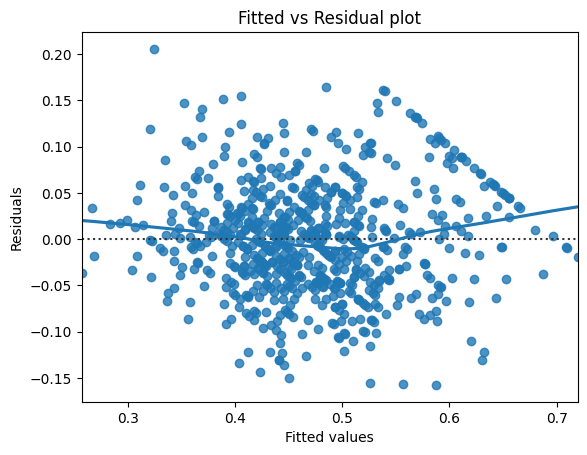

In [64]:
sns.residplot(data=df_pred, x='Fitted values', y='Residuals', lowess=True)
plt.title('Fitted vs Residual plot');

In [65]:
x_train_dropped.columns

Index(['const', 'visitors', 'views_trailer', 'major_sports_event_1',
       'genre_Sci-Fi', 'dayofweek_Saturday', 'dayofweek_Sunday',
       'dayofweek_Thursday', 'dayofweek_Tuesday', 'dayofweek_Wednesday',
       'season_Spring', 'season_Summer', 'season_Winter'],
      dtype='object')

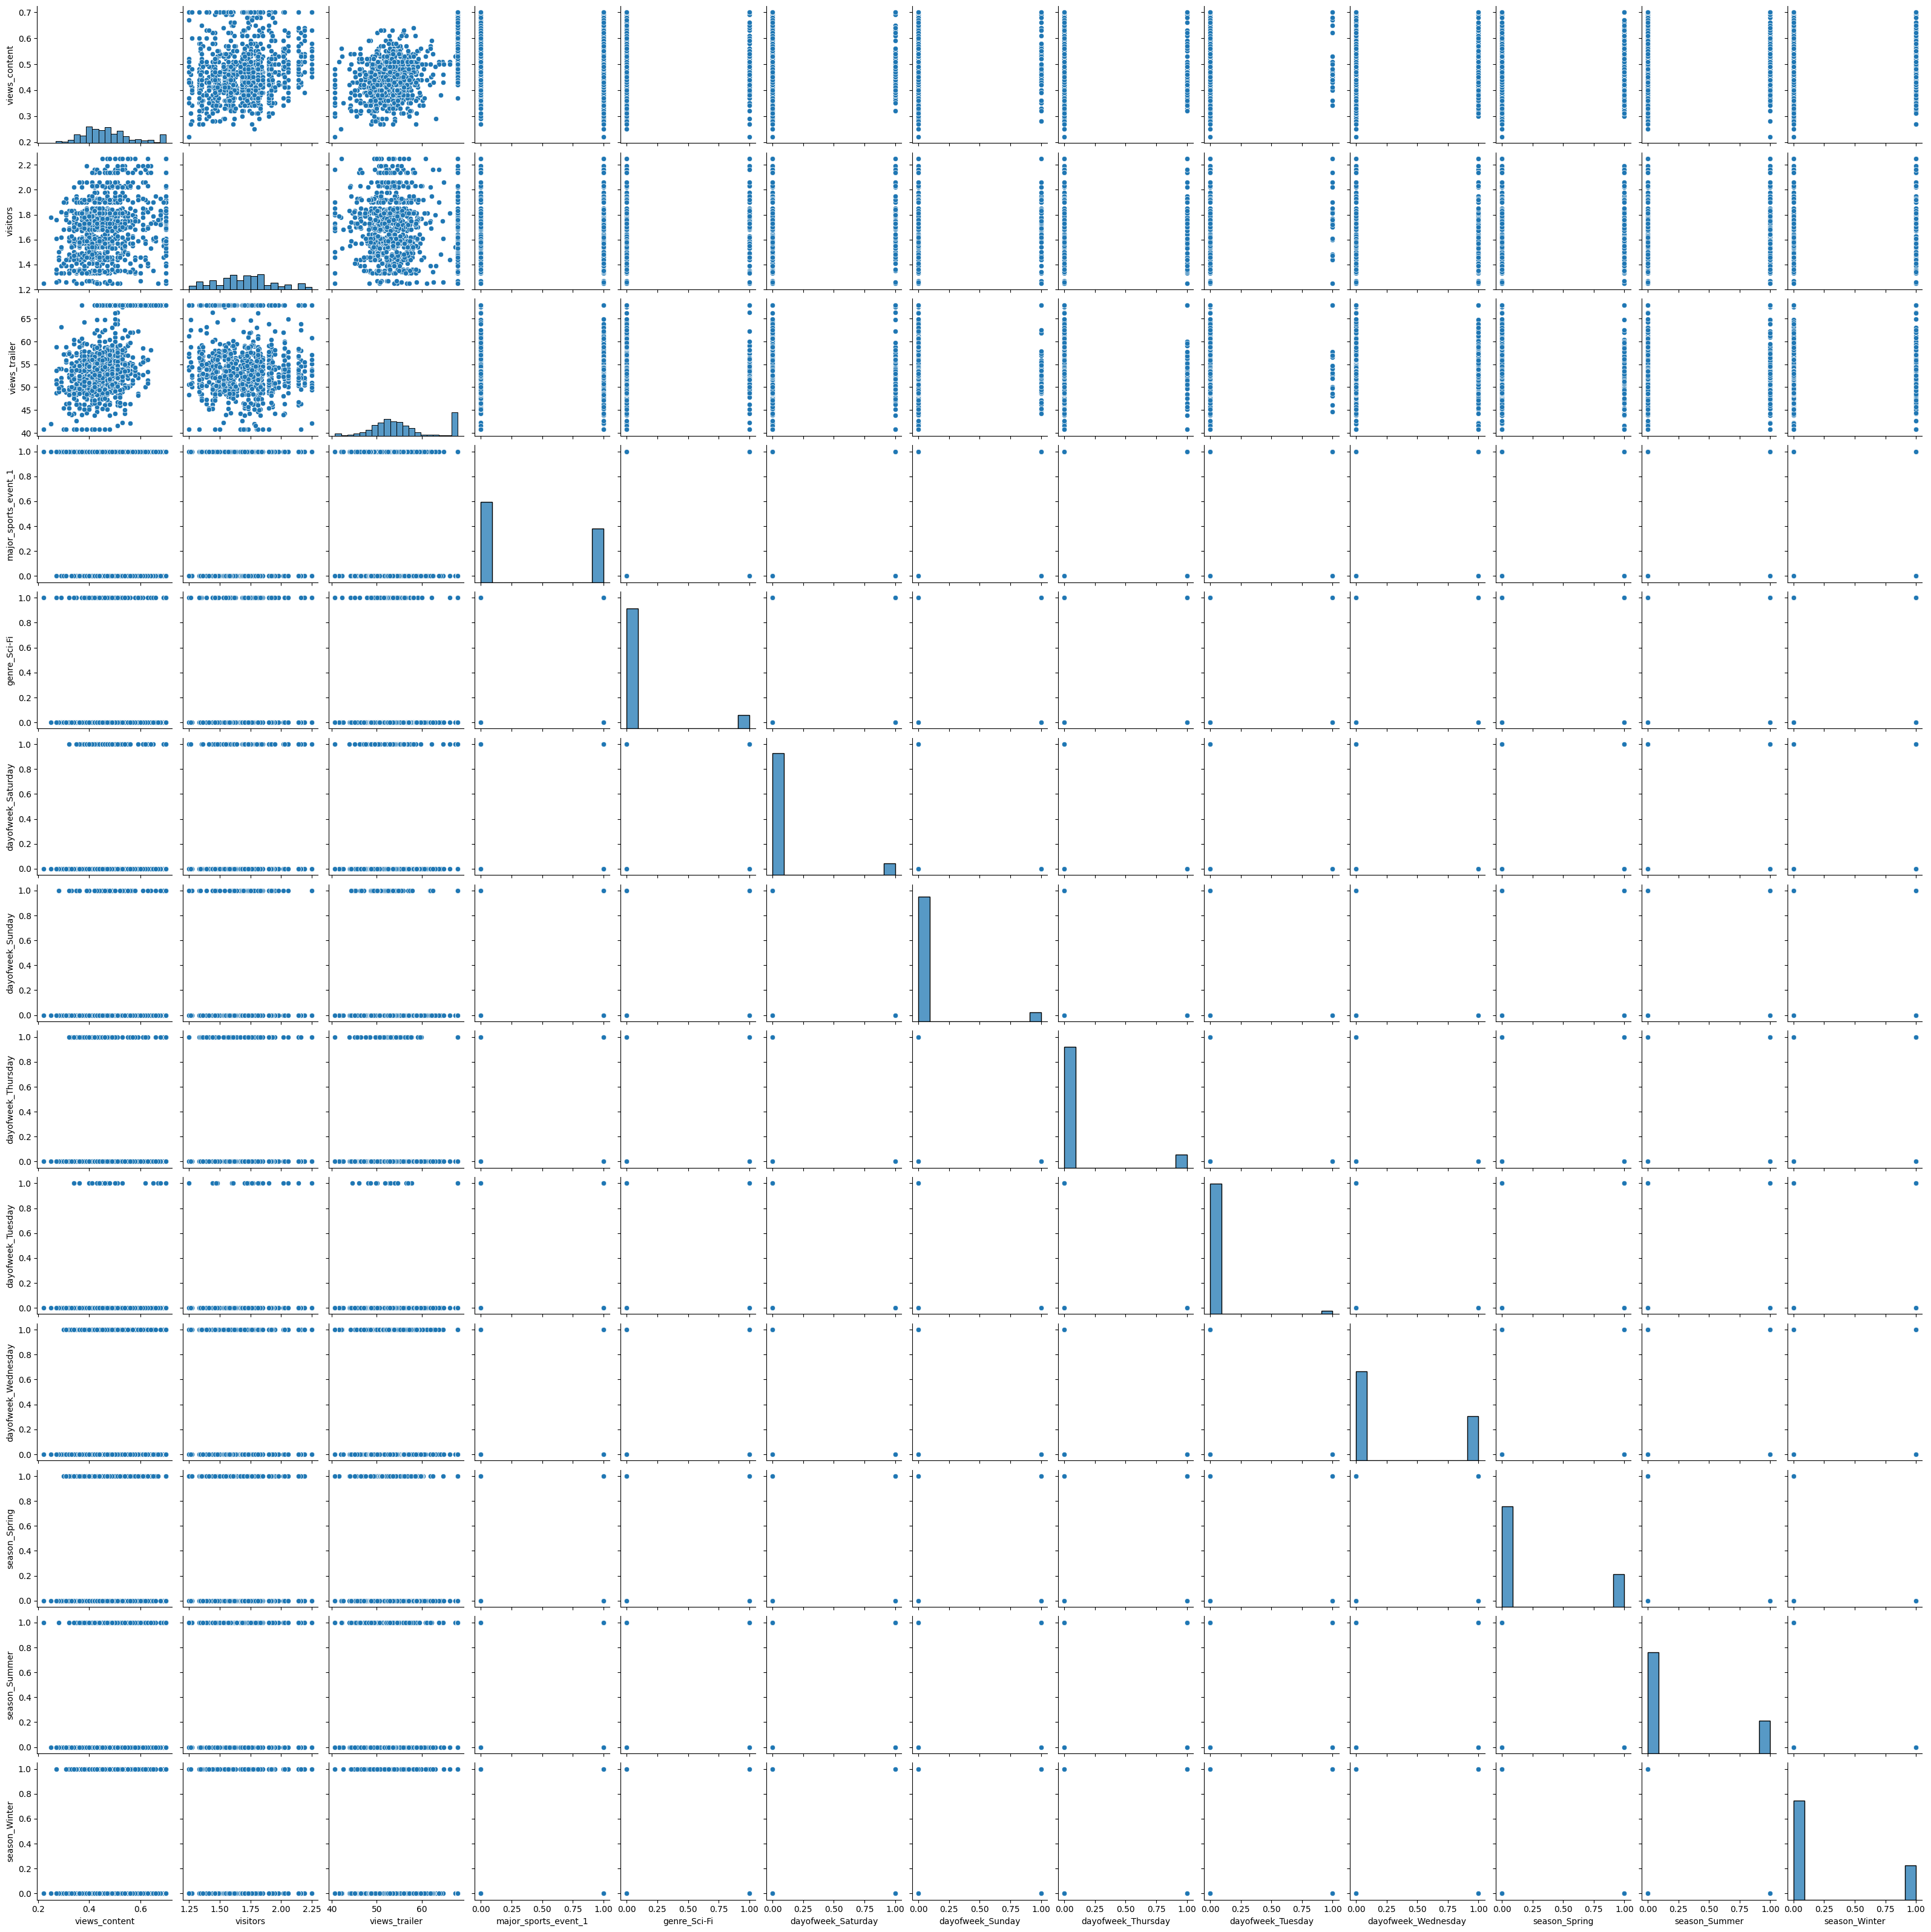

In [66]:
sns.pairplot(cData[['views_content','visitors', 'views_trailer', 'major_sports_event_1','genre_Sci-Fi', 'dayofweek_Saturday', 'dayofweek_Sunday',
'dayofweek_Thursday', 'dayofweek_Tuesday', 'dayofweek_Wednesday',  'season_Spring', 'season_Summer', 'season_Winter']])

In [67]:
#normality

Text(0.5, 1.0, 'normality of residuals')

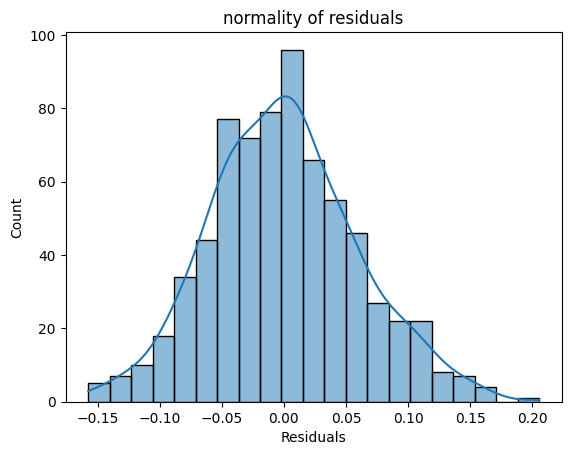

In [68]:
sns.histplot(df_pred['Residuals'],kde=True )
plt.title('normality of residuals')

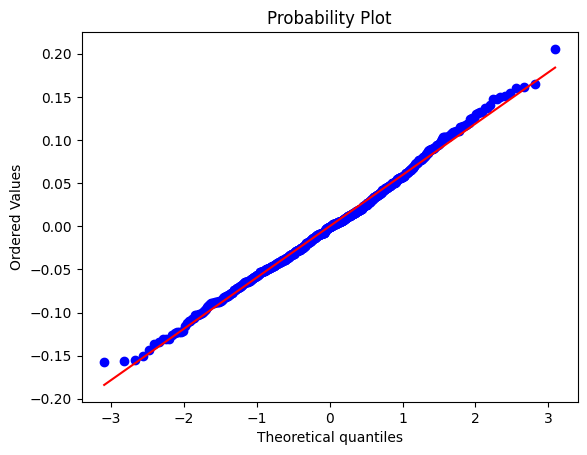

In [69]:
import pylab
import scipy.stats as stats
stats.probplot(df_pred['Residuals'], dist='norm', plot=pylab);

In [70]:
stats.shapiro(df_pred['Residuals'])

ShapiroResult(statistic=0.995545105140456, pvalue=0.04188836502735423)

In [71]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [72]:
name = ['f statistic', "p-value"]
test = sms.het_goldfeldquandt(df_pred['Residuals'], x_train_dropped)
lzip(name,test)

[('f statistic', 1.1616405144400679), ('p-value', 0.08477906249012608)]

In [73]:
print(olsres_3.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     101.2
Date:                Sun, 06 Oct 2024   Prob (F-statistic):          5.85e-143
Time:                        03:38:29   Log-Likelihood:                 983.60
No. Observations:                 700   AIC:                            -1941.
Df Residuals:                     687   BIC:                            -1882.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2672 

In [74]:
 olsres_3.params

,0
const,-0.267237
visitors,0.116937
views_trailer,0.009274
major_sports_event_1,-0.062188
genre_Sci-Fi,0.018806
dayofweek_Saturday,0.051507
dayofweek_Sunday,0.037651
dayofweek_Thursday,0.017328
dayofweek_Tuesday,0.045187
dayofweek_Wednesday,0.039679


In [75]:
x_train_dropped.columns

Index(['const', 'visitors', 'views_trailer', 'major_sports_event_1',
       'genre_Sci-Fi', 'dayofweek_Saturday', 'dayofweek_Sunday',
       'dayofweek_Thursday', 'dayofweek_Tuesday', 'dayofweek_Wednesday',
       'season_Spring', 'season_Summer', 'season_Winter'],
      dtype='object')

In [76]:
x_test.columns

Index(['const', 'visitors', 'ad_impressions', 'views_trailer',
       'major_sports_event_1', 'genre_Comedy', 'genre_Drama', 'genre_Horror',
       'genre_Others', 'genre_Romance', 'genre_Sci-Fi', 'genre_Thriller',
       'dayofweek_Monday', 'dayofweek_Saturday', 'dayofweek_Sunday',
       'dayofweek_Thursday', 'dayofweek_Tuesday', 'dayofweek_Wednesday',
       'season_Spring', 'season_Summer', 'season_Winter'],
      dtype='object')

In [77]:
x_test.head()

,const,visitors,ad_impressions,views_trailer,major_sports_event_1,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,...,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
507,1.0,1.58,1323.74,57.85000,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
818,1.0,1.54,2122.33,56.82000,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
452,1.0,1.82,1152.29,67.96625,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
368,1.0,2.03,1145.37,59.99000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
242,1.0,1.75,1060.86,58.99000,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [78]:
x_test_dropped = x_test.drop(['ad_impressions', 'genre_Comedy', 'genre_Drama',
                   'genre_Horror', 'genre_Others', 'genre_Romance',
                   'genre_Thriller', 'dayofweek_Monday'], axis=1)

In [79]:
x_test_dropped

,const,visitors,views_trailer,major_sports_event_1,genre_Sci-Fi,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
507,1.0,1.58,57.85000,0,0,0,1,0,0,0,1,0,0
818,1.0,1.54,56.82000,0,0,0,0,1,0,0,1,0,0
452,1.0,1.82,67.96625,0,0,0,0,0,0,0,0,0,0
368,1.0,2.03,59.99000,0,1,0,0,0,0,0,1,0,0
242,1.0,1.75,58.99000,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,1.0,1.57,59.59000,0,0,0,0,1,0,0,0,0,0
415,1.0,1.76,59.16000,1,0,0,0,0,0,0,0,0,1
61,1.0,1.92,67.96625,0,1,0,0,0,0,0,0,0,1
347,1.0,1.57,48.73000,1,0,0,0,0,0,1,0,0,1


In [80]:
y_pred = olsres_3.predict(x_test_dropped )

In [81]:
rmse = np.sqrt(mean_squared_error(y_train, df_pred['Fitted values']))
rmse

0.059363292924986884

In [82]:
rmse1 = np.sqrt(mean_squared_error(y_test, y_pred))
rmse1

0.0655656160787471

In [83]:
mae1 = mean_absolute_error(y_train, df_pred['Fitted values'])
mae1

0.04677242342744108

In [84]:
mae2 = mean_absolute_error(y_test, y_pred)
mae2

0.053144896131140075